# Basic Probability Calculations

In [338]:
import scipy.stats as stats 
import numpy as np
import matplotlib.pyplot as plt

In [339]:
from scipy.interpolate import interp1d

(400,)
(400,)
(400, 400)
(400, 400)


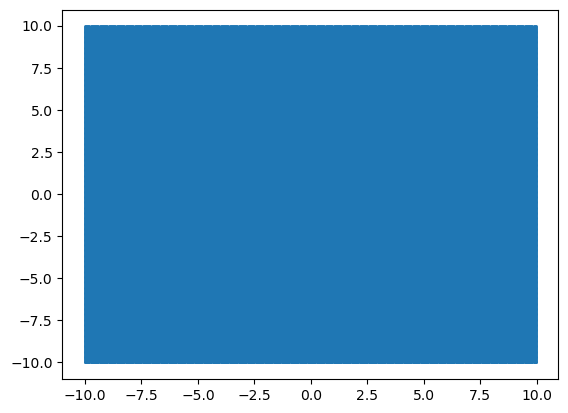

In [340]:
# define a function that would give you a 2D distribution. Do not pick a Gaussian.

def f(x,y):
    return np.exp(-(x**2+y**2)/25)*np.sin(x-1)**2*np.cos((y+0.5)/2)**2

# define a prior box:
x_array = np.arange(-10,10,0.05)
y_array = np.arange(-10,10,0.05)
xs,ys = np.meshgrid(x_array, y_array, indexing='ij')

plt.scatter(xs, ys,s=1)

print(x_array.shape)
print(y_array.shape)
print(xs.shape)
print(ys.shape)

In [341]:
# sample your reference probability on a 2D regular grid in the prior box

f_sampled = f(xs,ys)


In [342]:
print(xs.shape)
print(f_sampled.shape)
print(ys.shape)

(400, 400)
(400, 400)
(400, 400)


In [343]:
# normalize the pdf

int_x = np.trapz(f_sampled, x_array, axis=0)
print(int_x.shape)
int = np.trapz(int_x, y_array)
print(int.shape)
print(int)

(400,)
()
19.50205264165419


In [344]:
pdf = f_sampled/int

new_int = np.trapz(np.trapz(pdf, x_array, axis=0), y_array)
print(new_int)
print(xs.shape)
print(ys.shape)
print(pdf.shape)

1.0
(400, 400)
(400, 400)
(400, 400)


Text(0.5, 1.0, 'contours')

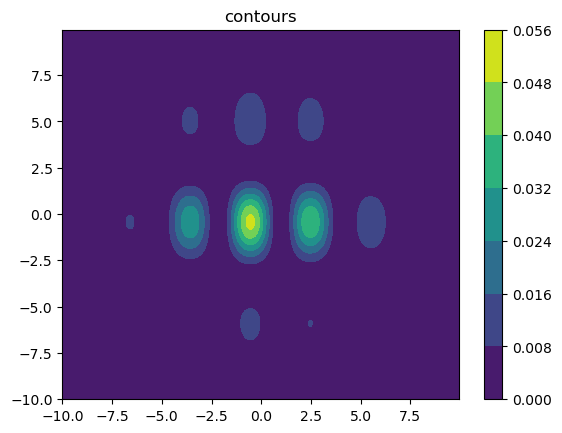

In [345]:
# contour plot the distribution (on generic iso-contours, the default ones work)
contour=plt.contourf(xs,ys, pdf)
#plt.clabel(contour, inline=False, fontsize=8)
plt.colorbar(contour)
plt.title('contours')


In [346]:
# marginalize the distribution and get two 1D distributions. Plot them.

pdf_of_y = np.trapz(pdf, xs, axis=0)
pdf_of_x = np.trapz(pdf, ys, axis=1)

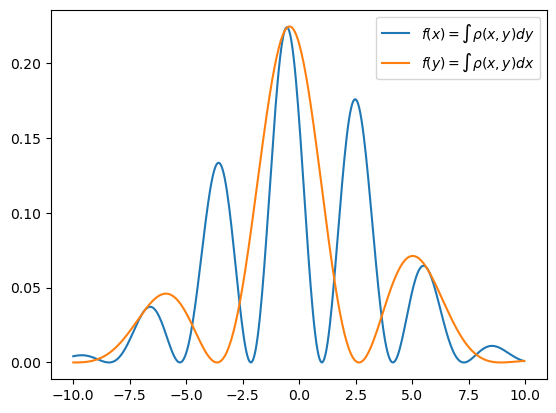

In [347]:
plt.plot(x_array, pdf_of_x, label=r'$f(x)=\int \rho(x,y)dy$')
plt.plot(y_array, pdf_of_y, label=r'$f(y)=\int \rho(x,y)dx$')
plt.legend()

In [348]:
# check that marginalization does not alter the normalization of the pdf.

norm_f_x = np.trapz(pdf_of_x, x_array)
print(norm_f_x)
norm_f_y = np.trapz(pdf_of_y, y_array)
print(norm_f_x)

1.0
1.0


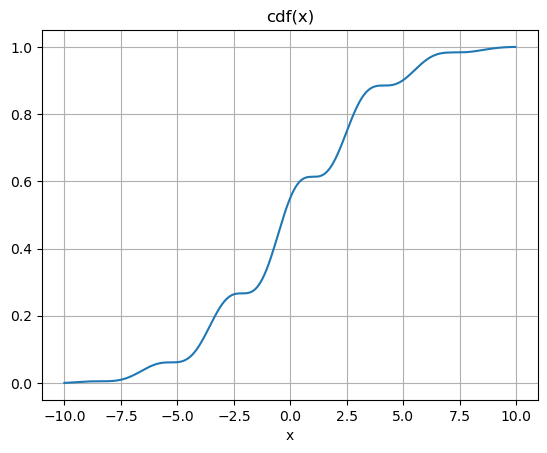

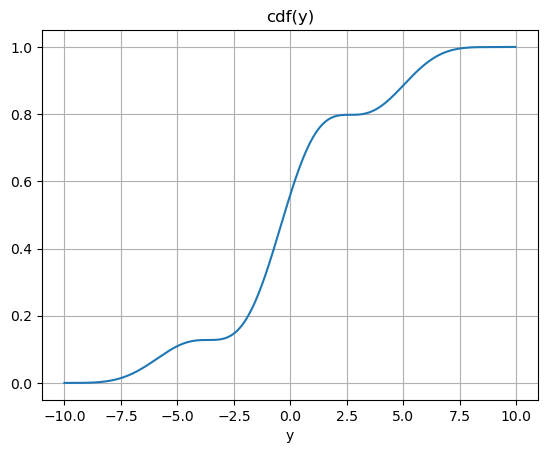

In [349]:
# calculate the cumulative distribution function of the 1D distribution. Plot it.

cdf_x = np.array([np.trapz(pdf_of_x[:i], x_array[:i]) for i in range(1, len(x_array) + 1)])
plt.plot(x_array, cdf_x)
plt.title('cdf(x)')
plt.xlabel('x')
plt.grid()
plt.show()

cdf_y = [np.trapz(pdf_of_y[:i], y_array[:i]) for i in range(1, len(y_array) + 1)]
plt.plot(y_array, cdf_y)
plt.title('cdf(y)')
plt.xlabel('y')
plt.grid()
plt.show()

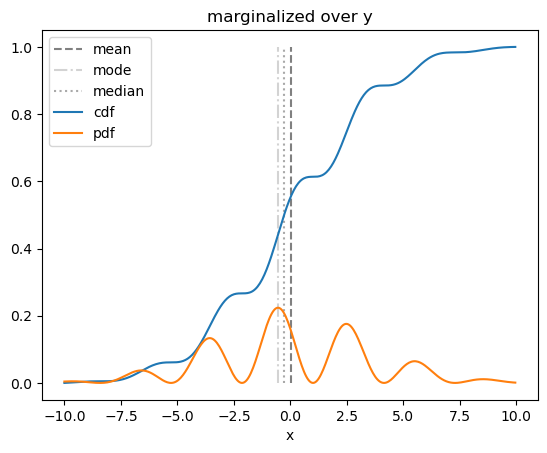

In [350]:
# calculate the mean, median and mode. Add them to the plot.

mean_x = np.trapz(x_array*pdf_of_x, x_array)
mode_x = x_array[np.argmax(pdf_of_x)]
inverse_cdf = interp1d(cdf_x, x_array)
median_x = inverse_cdf(0.5)

plt.vlines(mean_x, 0.0,1.0, label='mean', linestyles='--', color='grey')
plt.vlines(mode_x, 0.0, 1.0, label = 'mode', linestyles='-.', color='lightgrey')
plt.vlines(median_x, 0.0, 1.0, label = 'median', linestyles=':', color='darkgrey')

plt.plot(x_array, cdf_x, label='cdf')
plt.plot(x_array, pdf_of_x, label='pdf')
plt.title('marginalized over y')
plt.xlabel('x')
plt.legend()
plt.show()


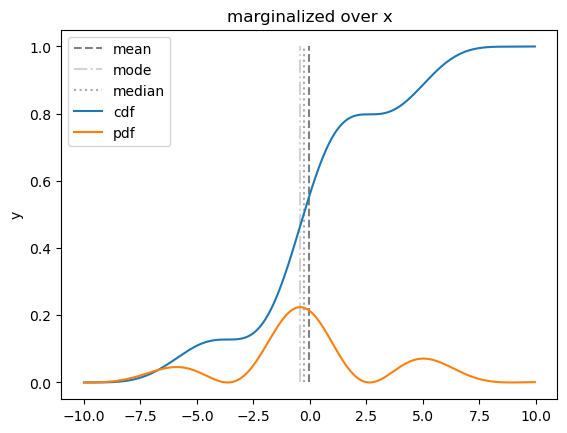

In [351]:
mean_y = np.trapz(y_array*pdf_of_y, y_array)
mode_y = y_array[np.argmax(pdf_of_y)]
inverse_cdf = interp1d(cdf_y, y_array)
median_y = inverse_cdf(0.5)

plt.vlines(mean_y, 0.0,1.0, label='mean', linestyles='--', color='grey')
plt.vlines(mode_y, 0.0, 1.0, label = 'mode', linestyles='-.', color='lightgrey')
plt.vlines(median_y, 0.0, 1.0, label = 'median', linestyles=':', color='darkgrey')

plt.plot(y_array, cdf_y, label='cdf')
plt.plot(y_array, pdf_of_y, label='pdf')
plt.title('marginalized over x')
plt.ylabel('y')
plt.legend()
plt.show()


In [352]:
# calculate the variance of the 1D distribution. Add to the plot the Gaussian approximation of your distribution.

var_x = np.array([(x-mean_x)**2 for x in pdf_of_x])
"""print(var_x.shape)
print(pdf_of_x.shape)
pdf_x_gauss_approx = stats.norm(loc=mean_x, scale=(var_x**0.5)).pdf(x_array)/
print(type(pdf_x_gauss_approx))

plt.plot(x_array, pdf_of_x)
plt.plot(x_array, pdf_x_gauss_approx)"""

'print(var_x.shape)\nprint(pdf_of_x.shape)\npdf_x_gauss_approx = stats.norm(loc=mean_x, scale=(var_x**0.5)).pdf(x_array)/\nprint(type(pdf_x_gauss_approx))\n\nplt.plot(x_array, pdf_of_x)\nplt.plot(x_array, pdf_x_gauss_approx)'

In [359]:
# calculate and plot the 68% HPD region for the 1D distribution. Plot it.



In [354]:
# make a 2D contour plot of the 2D 68% HPD region. How does it relate to the 1D region?